In [84]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [85]:
# Import the data from the json file
# Data is in format {},{},{},... and in a text file

# Read the data from the file
with open('../../Dataset/build_dataset.txt') as f:
    data = f.readlines()

# Convert the data to a list of dictionaries
data = [json.loads(x.strip()) for x in data]

In [86]:
# Function to create a histogram
def create_histogram(x, y, title, xlabel, ylabel='Visitors', color='blue'):
    # Create a figure
    plt.figure(figsize=(10, 8))
    # Create a bar plot
    plt.bar(x, y, color=color, edgecolor='black')
    # Add a title and axis labels
    plt.title(title)
    # Print x label
    plt.xlabel(xlabel)
    # Print y label
    plt.ylabel(ylabel)
    # Rotate xticks
    plt.xticks(rotation=30)
    # Show the plot
    plt.show()

('Chrome', 'Safari', 'Internet Explorer', 'Firefox', 'Safari (iOS Device)', 'Opera', 'Other')
(4720, 1869, 1652, 1534, 113, 107, 8)


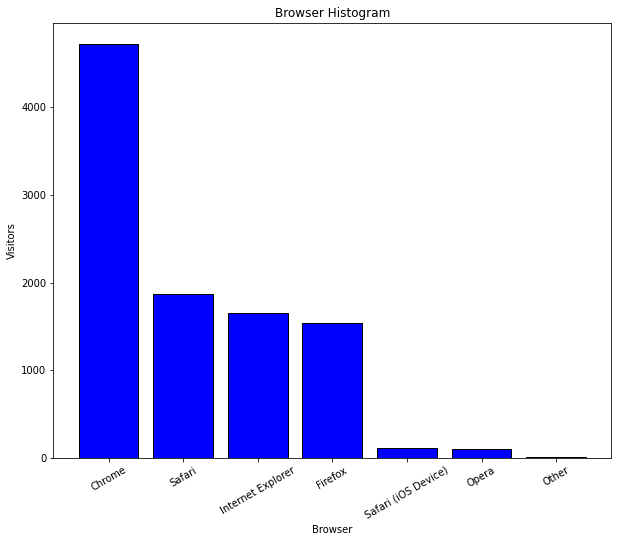

In [87]:
# Function to get the browser from the user agent
def get_browser():
    # Get the user agent from the data
    visitor_useragent = []
    for i in range(len(data)):
        visitor_useragent.append(data[i]['visitor_useragent'])
    
    # Get the browser from the user agent
    browser = []
    for i in range(len(visitor_useragent)):
        # Simplifying browser and extracting the browser name
        if 'Chrome' in visitor_useragent[i]:
            browser.append('Chrome')
        elif 'Firefox' in visitor_useragent[i]:
            browser.append('Firefox')
        elif 'Safari' in visitor_useragent[i] and 'Chrome' not in visitor_useragent[i]:
            browser.append('Safari')
        elif 'Opera' in visitor_useragent[i]:
            browser.append('Opera')
        elif 'Internet Explorer' in visitor_useragent[i] or 'MSIE' in visitor_useragent[i] or 'Trident' in visitor_useragent[i]:
            browser.append('Internet Explorer')
        elif 'iPhone' in visitor_useragent[i] or 'iPad' in visitor_useragent[i] or 'iPod' in visitor_useragent[i]:
            browser.append('Safari (iOS Device)')
        else:
            browser.append('Other')
     
    # Return the browser
    return browser

# Get browser counts
browser_counts = Counter(get_browser())

sorted_browser_counts = sorted(browser_counts.items(), key=lambda x: x[1], reverse=True)
browsers, counts = zip(*sorted_browser_counts)
print(browsers)
print(counts)

create_histogram(browsers, counts, 'Browser Histogram', 'Browser')